# <img src="uni-logo.png" alt="Logo UNI" width=100 hight=200 align="right">


<br><br><br>
<h1><font color="#1D65DD" size=5>Python desde cero</font></h1>



<h1><font color="#1D65DD" size=6>Matplotlib</font></h1>

<br>
<div style="text-align: right">
<font color="#1D65DD" size=3>Yuri Coicca, M.Sc.</font><br>

</div>

---

<a id="indice"></a>
<h2><font color="#004D7F" size=5>Índice</font></h2>


* [1. Introducción](#section1)
    * [Estructura de Matplotlib](#section11)
* [2. Elementos de un gráfico](#section2)    
* [3. Gráficos con <font face="monospace"> pyplot </font>](#section3) 
    * [Elaboración de un gráfico básico con  <font face="monospace"> plot()</font>](#section31)
    * [Acceso a los elementos del gráfico](#section32)
    * [Elementos adicionales](#section33)
    * [Estilos](#section34)    
* [4. Gráficas más comunes](#section4)     
    * [Gráficos de pila: <font face="monospace"> stackplot()</font>](#section41) 
    * [Gráficos de barras: <font face="monospace"> bar()</font>](#section42)
    * [Diagramas de sectores o _Pie charts_: <font face="monospace"> pie()</font>](#section43)       
    * [Histogramas: <font face="monospace"> hist()</font>](#section44)  
    * [Gráficos de dispersión I: <font face="monospace"> scatter()</font>](#section45)
    * [Mapas de calor: <font face="monospace"> hist2d()</font>](#section46)  
    * [Gráficos de dispersión II: <font face="monospace"> scatter()</font>](#section47)
    * [Diagramas de cajas y violines: <font face="monospace"> boxplot()</font> y <font face="monospace"> violinplot()</font> ](#section48)  
    * [Gráficas de dispersión 3D](#section49)
          
* [5. Múltiples grafos en una figura](#section5)
    * [<font face="monospace"> pyplot.subplot()</font>](#section51) 
    * [<font face="monospace"> pyplot.subplots()</font>](#section52)  
    * [<font face="monospace"> pyplot.subplot2grid() </font> y <font face="monospace"> gridspec.GridSpec() </font>](#section53)
    * [Superposición de gráficas](#section54)

* [6. Interacción](#section6)    

---

In [1]:
#!pip install matplotlib==3.1.1

---

<a id="section1"></a>
# <font color="#004D7F"> 1. Introducción</font>

<br>

_Matplotlib_ es la librería de referencia de _Python_ para la elaboración de gráficas en análisis de datos. Posteriormente han surgido otras como: _Seaborn_, que es una capa construída por encima de _Matplotlib_ que facilita la elaboración de figuras complejas de manera sencilla;  _Bokeh_, que está orientada a la elaboración de gráficos interactivos para web; o _Plotly_, en el que las gráficas son parte de una herramienta más compleja. Sin embargo, _Matplotlib_ sigue siendo la librería más usada en ciencia de datos, con la ventaja que ello conlleva, ya que además de la documentación oficial, en la web existe abundante información relativa a ejemplos o solución de problemas concretos.

En esta introducción se verán los elementos necesarios para la elaboración de gráficos más comunes. Para la elaboración de gráficos específicos, se pueden consultar la [página oficial de la librería](http://matplotlib.org/) y, sobre todo,  las numerosas galerías de [ejemplos](http://matplotlib.org/examples/index.html) existentes en la red. 


<div class="alert alert-block alert-danger">
    
<i class="fa fa-exclamation-triangle" aria-hidden="true"></i>
    __¡Disclaimer!__  Este tutorial está orientado principalmente a la ___descripción de la herramienta___. Por eso se ha intentado cubrir una gran parte de situaciones y posibilidades, a pesar de que esto supone un sacrificio de la estética y las buenas prácticas de visualización <i class="fa fa-smile-o" aria-hidden="true"></i>.  
</div>

<div style="text-align: right">
<a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></font></a>
</div>


---

<a id="section11"></a> 
## <font color="#004D7F">Estructura de Matplotlib </font>


La arquitectura de la librería _Matplotlib_ se distribuye en 3 capas que, ordenadas de mayor a menor nivel de abstracción, son:

1. La capa de _Scripting_, que se sitúa en el nivel superior, y permite la elaboración de gráficos sin necesidad de acceder a las capas inferiores. 

2. La API de _Artists_ u objetos gráficos, que implementa todos los objetos y métodos que permiten componer los gráficos.

3. La capa _Backend_, que se sitúa en el nivel más bajo, y se encarga de la renderización de los objetos gráficos.

A continuación, se describe brevemente cada una de ellas.

### <font color="#004D7F">La capa de _scripting_ </font>

El módulo principal de esta capa es `matplotlib.pyplot`. Proporciona una interfaz, parecida a la de otras herramientas como _Matlab_, que permite elaborar las gráficas directamente y también gestionar la creación de figuras y el _backend_  ([documentación](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html)). 

La siguiente celda de código construye una gráfica sencilla y le asigna un título. Tanto la creación de la figura a bajo nivel, como la construcción de la gráfica y el acceso a sus elementos (en este caso el título) se hace a través de `matplotlib.pyplot`.

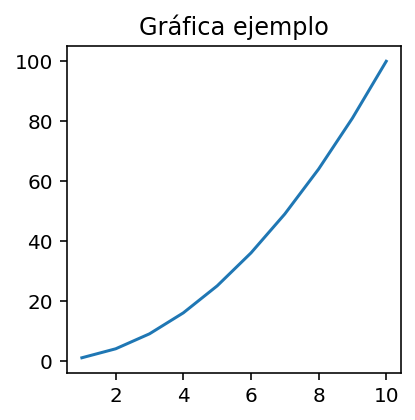

In [3]:
%matplotlib inline

plt.figure(figsize=(3,3))
plt.plot([1,2,3,4,5,6,7,8,9,10],[1,4,9,16,25,36,49,64,81,100])
plt.title("Gráfica ejemplo");

<div class="alert alert-block alert-warning">
    
<i class="fa fa-exclamation-circle" aria-hidden="true"></i>
 &nbsp; En este tutorial se trabajará principalmente con `matplotlib.pyplot` (en adelante nos referiremos a éste módulo simplemente como `pyplot`), por ser éste el modo de uso más común de _Matplotlib_.
</div>

### <font color="#004D7F">La API de _artists_ u objetos gráficos </font>

En esta capa se implementan todos los objetos gráficos o _artists_. Prácticamente todos los elementos y las operaciones de dibujo son accesibles directamente a través de la clase `matplotlib.axes.Axes`, que representa la superficie de la gráfica. No obstante, _sí que es común delegar las funciones de más bajo nivel_, como la creación de la figura, o el enlace con el _backend_, a la capa superior.

La siguiente gráfica, similar a la anterior, se construye de este modo. También se enumeran los objetos gráficos que la componen. Pueden apreciarse algunas componentes como los bordes de la imagen (`Spine`), los ejes $x$ e $y$ (`XAxis,YAxis`), los títulos ( `Text`), que están vacíos, y también el objeto que contiene la colección de puntos que componen la línea.

Objetos del gráfico:
	 Line2D(_line0)
	 Spine
	 Spine
	 Spine
	 Spine
	 XAxis(27.0,27.0)
	 YAxis(27.0,27.0)
	 Text(0.5, 1.0, 'Gráfica ejemplo')
	 Text(0.0, 1.0, '')
	 Text(1.0, 1.0, '')
	 Rectangle(xy=(0, 0), width=1, height=1, angle=0)

Línea:


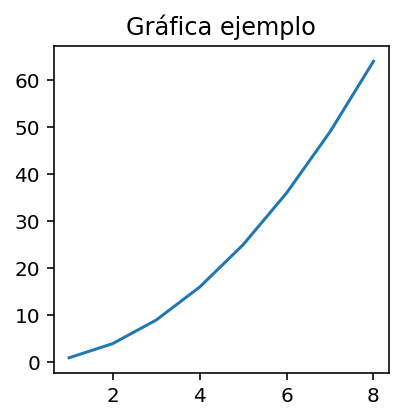

In [4]:
# Crea la figura con pyplot
fig = plt.figure(figsize=(3,3))          

# Utiliza la API para construir la gráfica.

# Accede al objeto Axes
axes = fig.gca()   

# Dibuja desde el objeto Axes
linea = axes.plot([1,2,3,4,5,6,7,8],[1,4,9,16,25,36,49,64]);
axes.set_title("Gráfica ejemplo")

# Enumera los objetos.
print("Objetos del gráfico:")
elementos = axes.get_children()  
for elemento in elementos:
    print("\t",elemento)
print("\nLínea:")
print("\t",linea)

### <font color="#004D7F">La capa _Backend_ </font>

Es la capa de más bajo nivel, y se encarga de la renderización de los objetos. _Matplotlib_ puede ser utilizado para la generación de gráficos en varios contextos: de manera independiente, en aplicaciones _tk_ o _qt_, en _notebooks_, en archivos de imagen, etc. Debido a que el proceso de renderización depende del contexto, es necesario un _backend_ específico para cada uno de ellos.  La siguiente línea muestra los _backends_ disponibles.

In [5]:
%matplotlib --list

Available matplotlib backends: ['tk', 'gtk', 'gtk3', 'wx', 'qt4', 'qt5', 'qt', 'osx', 'nbagg', 'notebook', 'agg', 'svg', 'pdf', 'ps', 'inline', 'ipympl', 'widget']


En el caso de las libretas _Jupyter_, se trabaja con dos _backends_ distintos: `inline` y `notebook`. El primero de ellos muestra los gráficos como imágenes estáticas, y es usado frecuentemente cuando las libretas se utilizan como informe (es el usado en los ejemplos anteriores). El segundo permite cierto nivel de interactividad, es más flexible, y es más indicado cuando se han de hacer modificaciones sobre un mismo gráfico de manera progresiva. 

En _Python_, la elección del _backend_ se hace mediante la función `matplotlib.use(nombre_backend)`. En Jupyter, la elección de un _backend_ se puede hacer mediante un _magic_. 

In [6]:
%matplotlib notebook

En realidad, puede verse que la especificación `notebook` hace que se utilice el _backend_ `nbagg`.

In [7]:
import matplotlib as mpl
mpl.get_backend()

'nbAgg'

<div style="text-align: right">
<a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></font></a>
</div>


---

<a id="section2"></a> 
## <font color="#004D7F" >2. Elementos de un gráfico </font>

Prácticamente todas las gráficas de _Matplotlib_ comparten un conjunto de elementos comunes. Los más importantes son:


- `figure`, que es el objeto gráfico principal que contiene a todos los demás. Una imagen se construye a partir de una figura, a la que se añaden el resto de componentes.
- `axes`, que contiene una gráfica. Cada figura puede contener varios objetos `axes`, es decir, mostrar varias gráficas. 
- `axis`, que se refiere a los ejes $x$ e $y$  de la gráfica. Éstos, a su vez, contienen otra serie de objetos, como son los `ticks` o puntos que representan la escala, y `ticklabels`, que son las etiquetas de la escala.
- `title`, `xlabel` e `ylabel`, que corresponden al título, etiqueta del eje $x$, y etiqueta del eje $y$, respectivamente. 
- `legend`, que permite asociar las distintas marcas/colores con etiquetas.


La siguiente imagen muestra gráficamente estos objetos.

<img src="Figura.png" alt="Estructura de gráfica" align="center" width="500">

Además, las imagenes se componen a partir de primitivas gráficas básicas (`Line2D`, `Rectangle`, `Text`, etc), que pueden ser situadas arbitrariamente en la figura y representan la información particular. Las propiedades de estos elementos son accesibles y pueden ser modificadas. Bien directamente a través de su API, o a través de la interfaz `pyplot`. 

<div style="text-align: right">
<a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></font></a>
</div>

---

<a id="section3"></a> 
# <font color="#004D7F"> 3. Gráficos con <font face=monospace> pyplot() </font> </font>

<br>

El módulo `matplotlib.pyplot` implementa métodos y objetos para la creación de la mayoría de gráficas de uso común. Estos métodos también permiten acceder y modificar las propiedades de gran mayoría de los elementos (`axis`, `ticks`, `labels`, etc), aunque ocasionalmente se puede combinar con el acceso a la API, ya que ambos modos de trabajo no son incompatibles ([documentación](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html)).

Con alguna salvedad, las gráficas que se construyen con `pyplot()` (también con la API) se utilizan para representar datos que pueden ser proporcionados en varios formatos: colecciones estándar de _Python_ (tuplas, listas); Arrays _Numpy_; y _Series_ y _DataFrames_ de _Pandas_. Además, `pyplot` permite  trabajar de manera natural con tipos específicos de datos, como por ejemplo `datetime`. Por último, el manejo de las colecciones y tipos de datos es relativamente transparante, por lo que no hay que llevar a cabo ninguna conversión explícita.
<br>

<div style="text-align: right">
<a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></font></a>
</div>


---

<a id="section31"></a> 
## <font color="#004D7F"> Elaboración de un gráfico básico con  <font face="monospace"> plot()</font> </font>


La función `pyplot.plot()` es la más básica, y se usa para representar series de datos. Además de los valores correspondientes a los ejes $x$ e $y$, `pyplot.plot()` acepta parámetros como el aspecto de los puntos o líneas utilizados para representar los datos, el color, etc ([documentación](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot)).  Algunos de los más importantes son:

- `marker`. Código de la marca (objeto gráfico) con el que se dibuja cada punto. En la documentación de `plot` se describen con detalle las marcas ([enlace](https://matplotlib.org/api/markers_api.html#module-matplotlib.markers)). 
- `markerfacecolor`, `markeredgecolor`. Color de la marca y de la línea que la delimita.
- `markersize`, `markeredgewidth`. Tamaño de la marca y anchura de la línea que la delimita.  
- `linestyle`, `linewidth`. Estilo de la línea usada para unir los puntos y  anchura. 
- `color`. Color por defecto para las marcas y línea que las une. Si se ha indicado el color de las marcas, solamente afecta a las líneas. 
- `label`. Etiqueta que permite identificar la serie. 

El siguiente ejemplo se muestra la puntuación de los tres equipos a lo largo de las jornadas. Muestra varias llamadas sucesivas a `plot` con varias combinaciones de parámetros ilustrativas. Cuando se invoca `plot()` varias veces, dibuja las series sobre la figura activa.

<IPython.core.display.Javascript object>


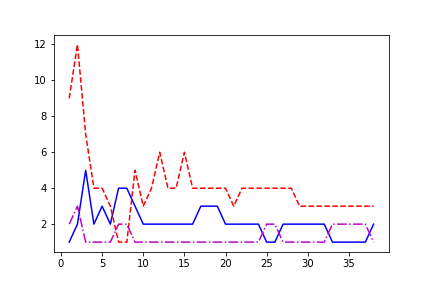

In [8]:
%matplotlib notebook

# Lee los datos
datos_liga = pd.read_csv('data/datos_liga.csv', index_col=0)
jornada = datos_liga.index

# Figura
plt.figure(figsize=(6,4))
plt.plot(jornada, datos_liga['Barcelona'], color='blue', linestyle='-');
plt.plot(jornada, datos_liga['Atlético'], color='red', linestyle='--');  
plt.plot(jornada, datos_liga['R. Madrid'], color='m', linestyle='-.');


# Dibuja la serie con cuadrados (s) de color rojo (r), tamaño 5, y con una línea contínua (-) de color azul ('blue')
#plt.plot(jornada, datos_liga['Barcelona'], marker='s', markerfacecolor='r', markersize=5, color='blue', linestyle='-');

# Dibuja la serie con estrellas (*) de tamaño 10, con interior blanco (w), con borde de color rojo('red') y sin línea.
#plt.plot(jornada, datos_liga['Atlético'], marker='*', markersize=10, markerfacecolor='w', linestyle='None', color='red');  

# Dibuja la serie con una línea de color magenta
#plt.plot(jornada, datos_liga['R. Madrid'], color='m', linewidth=2);

La función `pyplot.plot()` también permite representar varias series de datos en una con una sola llamada. En este caso, se pueden elegir los colores y marcadores de cada serie directamente con un String ([documentación](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot)). Este modo de funcionamiento también admite parámetros. Sin embargo, éstos se aplican a cada una de las series. 

En el ejemplo siguiente, todas las series se muestran con una línea discontínua (`--`) y el interior de las marcas de color blanco (`w`).

<IPython.core.display.Javascript object>


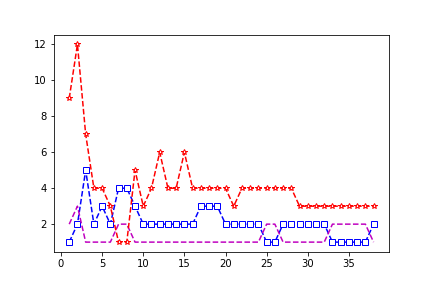

In [9]:
plt.figure(figsize=(6,4))
plt.plot(jornada, datos_liga['Barcelona'], 'bs', 
         jornada, datos_liga['R. Madrid'], 'm',
         jornada, datos_liga['Atlético'], 'r*',  
         linestyle='--', markerfacecolor='w');

<div style="text-align: right">
<a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></font></a>
</div>


---

<a id="section32"></a> 
## <font color="#004D7F"> Acceso a los elementos de un gráfico</font>
El módulo `pyplot` proporciona funciones que permiten acceder a los distintos elementos del gráfico (los que no son la serie). A continuación se dibuja una figura similar a la anterior para, posteriormente, ir modificándola con cada uno de ellos. 

<IPython.core.display.Javascript object>


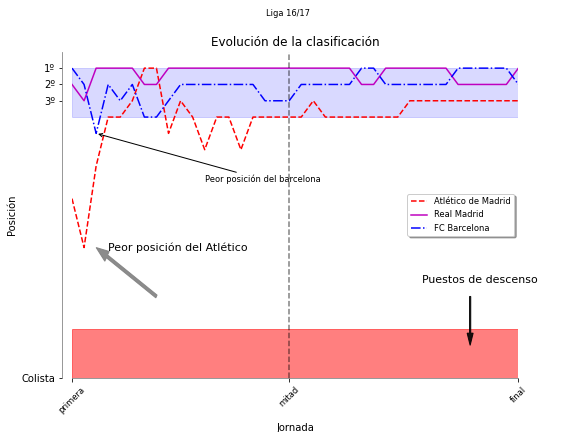

In [10]:
plt.figure(figsize=(8,6))

line_am = plt.plot(jornada, datos_liga['Atlético'], 'r--', label='Atlético de Madrid');
line_rm = plt.plot(jornada, datos_liga['R. Madrid'], 'm-', label='Real Madrid');
line_fb = plt.plot(jornada, datos_liga['Barcelona'], 'b-.',label='FC Barcelona');


### <font color="#004D7F"> Títulos y etiquetas</font> 

Los títulos principal y secundario se añaden, respectivamente,  mediante las funciones `pyplot.title()` y `pyplot.suptitle()`. Las etiquetas de los ejes, mediante las funciones `pyplot.xlabel()` e `pyplot.ylabel()`.

In [11]:
# Añade el título 
plt.suptitle("Liga 16/17", fontsize="small") # Se cambia el tamaño de la fuente
plt.title("Evolución de la clasificación")
# Añade las etiquetas de los ejes
plt.xlabel("Jornada", color='black', labelpad=8)  # Se cambia el color de la fuente y se aleja
plt.ylabel("Posición", color='black');

### <font color="#004D7F"> Ejes </font> 

El rango de cada eje se establece mediante las funciones `pyplot.xlim()` e `pyplot.ylim()`. Es posible establecer los rangos de mayor a menor valor, cambiando así el aspecto de la gráfica. Por otra parte, la función `tick_params()` especifica qué ticks y etiquetas se muestran (hace referencia los cuatro bordes o `spine` de la figura).  También se pueden determinar los puntos concretos que se muestran en cada eje, su aspecto, mediante `pyplot.xticks()` y `pyplot.yticks()`. Por último, las funciones `pyplot.minorticks_off()`, `pyplot.minorticks_on()` ocultan o muestran las divisiones menores (ticks secundarios) en la gráfica. Los ticks(marcas) son los valores que se utilizan para mostrar puntos específicos en el eje de coordenadas. Puede ser un número o una cadena.

In [12]:
# Cambia los rangos
plt.xlim(1,38)
plt.ylim(20,0);

# Determina qué ticks y etiquetas se muestran. 

#plt.tick_params(top='off', bottom='on', left='on', right='off', labelleft='on', labelbottom='on')
plt.tick_params(top=False, bottom=True, left=True, right=False, labelleft=True, labelbottom=True)

# Cambia los tickes del eje x. 
jornadas_ejes = [1,19,38]                   # Puntos donde se dibujan los ticks. 
jornadas_str = ['primera','mitad','final']  # Etiquetas
# Añade los ticks. Indica que el color será gris, que el tamaño 
# de las etiquetas será pequeño, y que éstas se rotarán 45 grados. 
plt.xticks(jornadas_ejes, jornadas_str, size = 'small', color = 'black', rotation=45)

# Cambia los ticks del eje y.
plt.yticks([1,2,3,20],['1º','2º','3º','Colista'], color = 'black' );

# Oculta las divisiones más pequeñas en los ejes
plt.minorticks_off()

### <font color="#004D7F"> Leyenda </font> 

En los gráficos, además, se pueden incluir leyendas.  Esto se hace automáticamente añadiendo una etiqueta a cada serie (no tiene por qué ser la que se muestra en la figura), y luego invocando `pyplot.legend()` con los parámetros correspondientes. Uno de ellos, `loc`, determina dónde se coloca la leyenda. Si se asigna el valor `best` la leyenda se coloca automáticamente, y puede cambiar de ubicación al añadir o borrar elementos. Información con respecto a leyendas puede encontrarse [aquí](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.legend). Para leyendas más complejas puede consultarse esta [guía](http://matplotlib.org/users/legend_guide.html).

In [13]:
# Establece la leyenda en la gráfica. La localiza automáticamente. 
plt.legend(loc='best', fontsize='small', shadow=True);

### <font color="#004D7F"> Modificación de parámetros: <font face="monospace"> pyplot.setp()</font> </font> 

La función `pyplot.setp()` permite consultar y modificar los parámetros de los objetos gráficos. En el ejemplo anterior, se han almacenado las líneas en las variables `line_am`,`line_rm`, y `line_fb`. 

In [14]:
# Muestra todos los parámetros de la línea. Lo comentamos por claridad. 
#plt.setp(line_am)

# Establece el parámetro. 
plt.setp(line_am, marker='o');

### <font color="#004D7F"> Uso de la API </font> 

En algunos casos, incluso usando `pyplot`, es necesario acceder a la API gráfica para hacer ciertas modificaciones. Los márgenes o `spines` constituyen uno de ellos. El siguiente código borra los márgenes derecho y superior, y colorea de gris el izquierdo y el inferior.

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> La función `plt.gca()` devuelve el último objeto `Axes` donde se ha dibujado.
</div>

In [15]:
# Borra los márgenes derecho y superior
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# Cambia el color de los otros márgenes. 
plt.gca().spines['left'].set_color('grey')
plt.gca().spines['bottom'].set_color('grey')

## Mueve el eje 10 unidades hacia fuera
plt.gca().spines['left'].set_position(('outward', 10))

También es posible acceder de manera individual a los componentes gráficos. Por ejemplo, podemos eliminar las marcas de la línea modificada anteriormente. 

In [16]:
for point in line_am:
    point.set_marker('None')

<div style="text-align: right">
<a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></font></a>
</div>

---



<a id="section33"></a> 
## <font color="#004D7F"> Elementos adicionales</font>


###  <font color="#004D7F">  Líneas y rectángulos </font>

Las funciones `pyplot.axvline()` y `pyplot.axhline()` dibujan líneas verticales y horizontales, respectivamente. Mediante `pyplot.axvspan()` y `pyplot.axhspan()` se pueden dibujar rectángulos. Estas últimas funciones aceptan un parámetro, denominado `alpha` que regula la transparencia del objeto y que es común a prácticamente todos los objetos gráficos (también a las marcas dibujadas con `pyplot.plot()`.  

In [17]:
# Marca con un rectángulo horizontal los puestos de champions, y con otro los de descenso.
plt.axhspan(1,4, alpha = 0.15, color = 'b') # Este rectángulo es azul y casi transparente. 
plt.axhspan(17,20, alpha = 0.5, color = 'r') # Este rectángulo es rojo y menos transparente. 

# Dibuja una línea que marca la mitad de la temporada
plt.axvline(19, color = 'black', linestyle='--', alpha=0.5);

###  <font color="#004D7F">  Texto  </font>

El texto se añade mediante `pyplot.text()`. Los dos primeros parámetros constituyen el punto de referencia. Los parámetros `horizontalalignment` y `verticalalignment` determinan cómo debe ser la alineación del texto con respecto a este punto.

In [18]:
plt.text(30, 14, 
         'Puestos de descenso', 
         horizontalalignment='left', 
         verticalalignment='center', 
         fontsize=11);

plt.text(datos_liga['Atlético'].idxmax()+2, datos_liga['Atlético'].max(), 
         'Peor posición del Atlético', 
         horizontalalignment='left', 
         verticalalignment='center', 
         fontsize=11);

###  <font color="#004D7F">  Flechas y anotaciones  </font>



La función `pyplot.arrow()` permite dibujar flechas. Toma como primeros parámetros las coordenadas $x$ e $y$ del origen, y después las coordenadas de la punta en relación a este punto. Otros parámetros determinan si la longitud incluye la punta, la forma, etc. La siguiente figura dibuja una flecha que apunta al punto en que el Atlético de Madrid registró su peor clasificación. Como el punto de referencia es la punta, se ha desplazado el origen.



In [19]:
plt.arrow(34, 15, 0, 3, 
          length_includes_head = "True", shape = "full", color='black', alpha = 0.9, width=0.1, head_width=0.5)

plt.arrow(datos_liga['Atlético'].idxmax()+1+5, datos_liga['Atlético'].max()+3, -5,-3, 
          length_includes_head = "True", shape = "full", color='grey', alpha = 0.9, width=0.2, head_width=0.7);

Cuando se utilizan flechas y texto para hacer una anotación, se puede hacer directamente con la función `pyplot.annotate`. Ésta toma como parámetros las coordenadas de la punta de la flecha y el texto. En ambos casos, se puede especificar qué unidades se utilizan (en el ejemplo los datos). También las propiedades de la flecha. 

In [20]:
# Añade una anotación
plt.annotate('Peor posición del barcelona',
             xy = (datos_liga['Barcelona'].idxmax(), datos_liga['Barcelona'].max()),  
             xycoords = 'data', 
             xytext = (12, 8), 
             textcoords = 'data', 
             arrowprops = dict(arrowstyle = "->", color='black'), 
             fontsize='small', 
             color='black');

<div class="alert alert-block alert-danger">

<i class="fa fa-exclamation-triangle" aria-hidden="true"></i>
  A esta figura resultante nos referíamos anteriormente con _"no cuidar el aspecto visual"_.
</div>

<div style="text-align: right">
<a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></font></a>
</div>


---


<a id="section34"></a> 
## <font color="#004D7F">Estilos</font>

Hasta el momento, todas las gráficas de este tutorial se han elaborado a partir de un estilo básico. Sin embargo, el método `style` de _Matplotlib_ permite cambiar la aparencia de las gráficas, en muchos casos para adaptarlas al contexto (presentación, artículo, notebook, etc). Existe una gran variedad de estilos disponibles, que pueden consultarse en el objeto `pyplot.style.available`.

In [21]:
from matplotlib import style
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


El siguiente código cambia el estilo `seaborn`, y dibuja la serie anterior.

<IPython.core.display.Javascript object>


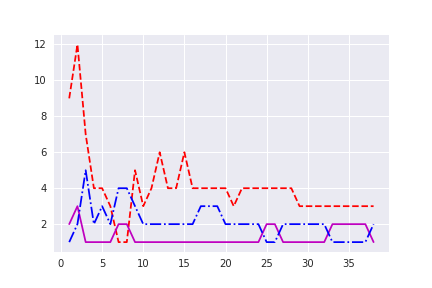

In [22]:
style.use('seaborn')

plt.figure(figsize=(6,4))

line_am = plt.plot(jornada, datos_liga['Atlético'], 'r--', label='Atlético de Madrid');
line_rm = plt.plot(jornada, datos_liga['R. Madrid'], 'm-',label='Real Madrid');
line_fb = plt.plot(jornada, datos_liga['Barcelona'], 'b-.',label='FC Barcelona');

In [23]:
# Restaura el estilo por defecto
style.use('default')

<div style="text-align: right">
<a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></font></a>
</div>


---

<a id="section4"></a>
# <font color="#004D7F"> 4. Gráficas más comunes </font>
<br>

A continuación se muestran las gráficas que son utilizadas de manera más frecuente en la exploración de datos. Además de la versión más simple, para cada una se añaden algunos elementos o cambios que también pueden resultar de interés. 
<br>

---


<a id="section41"></a> 
## <font color="#004D7F"> Gráficos de pila: <font face="monospace"> stackplot() </font></font>

Los gráficos de pila permiten representar varias series como una agregación. En _Matplotlib_ se construyen mediante la función `pyplot.stackplot()`. La siguiente figura muestra la evolución de la población activa, y del número de personas paradas y ocupadas, a lo largo de los últimos años en España (datos reales, aunque los de 2019 corresponden al tercer trimestre).

<IPython.core.display.Javascript object>


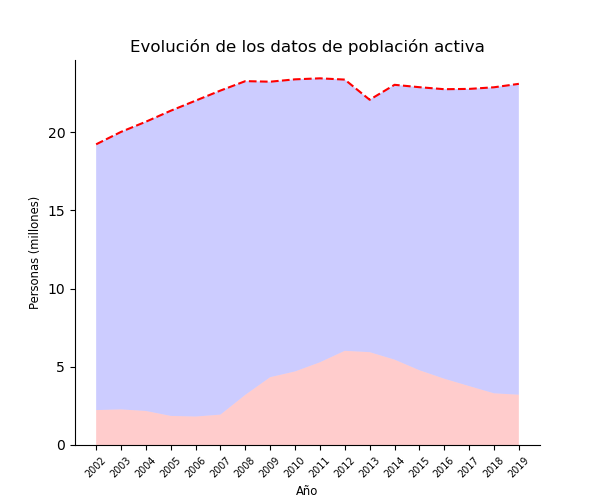

In [24]:
# Datos
años = [2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 
        2013, 2014, 2015, 2016, 2017, 2018, 2019]

n_ocupados =  [16.991, 17.740, 18.490, 19.509, 20.195, 20.717, 20.055, 18.890, 18.674, 
               18.153, 17.339, 16.135, 17.569, 18.094, 18.508, 18.998, 19.564, 19.874]

n_parados = np.array([2.232, 2.276, 2.176, 1.860, 1.819, 1.942, 3.206, 4.335, 4.702, 
                      5.287, 6.021, 5.935, 5.457, 4.779, 4.237, 3.766, 3.304, 3.214])

# Crea la figura
plt.figure(figsize=(6,5))

# Borra los márgenes derecho y superior
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# Muestra el gráfico con la proporción de cada serie. El parámetro alpha regula la intensidad del color.
plt.stackplot(años, n_parados, n_ocupados,  colors=['r','b'], alpha=0.2)

# Añade el título y las etiquetas de los ejes
plt.title("Evolución de los datos de población activa")
plt.xlabel("Año", fontsize="small")
plt.ylabel("Personas (millones)", fontsize="small");
plt.xticks(años, años, color = 'black', rotation=45, fontsize="x-small");

<div class="alert alert-block alert-warning">

<i class="fa fa-exclamation-circle" aria-hidden="true"></i>
__Importante__: `stackplot` suma las series automáticamente. En el ejemplo puede apreciarse que, para la segunda serie, el valor en el eje `y` es la suma de esa misma serie con la primera.
</div>

In [25]:
# Sumamos las series anteriores para comprobar el funcionamiento de stackplot
p_activa = n_ocupados+n_parados 
plt.plot(años, p_activa, 'r--');

<div style="text-align: right">
<a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></font></a>
</div>

---

<a id="section42"></a> 
## <font color="#004D7F"> Gráficos de barras: <font face="monospace"> bar() </font></font>

Son gráficos que se utilizan para mostrar cómo varía una variable numérica de interés en función del valor de otra variable categórica. Se dibujan con la función `pyplot.bar()`. 

Para ilustrar el uso de estas gráficas, se utilizará un conjunto de datos relativo a coches.

In [26]:
coches_df = pd.read_csv('data/coches.csv', index_col=0)
display(coches_df.head())

# Estas listas contendrán los tipos de coche, número, y los consumos medios.
tipo=[]
numero = []
consumo = []
consumo_carretera = []

# Extrae los datos relativos a cada tipo de coche
for t, df in coches_df.groupby('tipo'):
    tipo.append(t)
    numero.append(len(df))
    consumo.append(round(df['consumo'].mean(),2))
    consumo_carretera.append(round(df['consumoCarretera'].mean(),2))
    
print("Tipos:", tipo)
print("Número:", numero)
print("Consumo (media):", consumo)
print("Consumo carretera (media):", consumo_carretera)

,marca,tipo,consumo,consumoCarretera,cilindros,motor,potencia,RPM,largo,ancho,peso,precio
0,Acura,Small,25,31,4.0,1.8,140,6300,177,68,2705,15.9
1,Acura,Midsize,18,25,6.0,3.2,200,5500,195,71,3560,33.9
2,Audi,Compact,20,26,6.0,2.8,172,5500,180,67,3375,29.1
3,Audi,Midsize,19,26,6.0,2.8,172,5500,193,70,3405,37.7
4,BMW,Midsize,22,30,4.0,3.5,208,5700,186,69,3640,30.0


Tipos: ['Compact', 'Large', 'Midsize', 'Small', 'Sporty', 'Van']
Número: [16, 11, 22, 21, 14, 9]
Consumo (media): [22.69, 18.36, 19.55, 29.86, 21.79, 17.0]
Consumo carretera (media): [29.88, 26.73, 26.73, 35.48, 28.79, 21.89]


Los gráficos de barras permiten visualizar datos _unidimensionales de tipo categórico_. En este caso, el orden es irrelevante, y la altura de las barras refleja el número de apariciones de cada valor. 

<IPython.core.display.Javascript object>


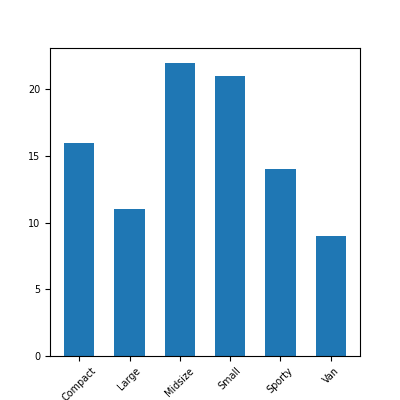

In [27]:
plt.figure(figsize=(4,4))
# Dibuja las barras. Establece la anchura a 0.6
plt.bar(tipo, numero, 0.6) 
# Fija, cambia el tamaño de fuente, y gira las etiquetas del eje x. ha representa el eje de rotación del texto
plt.xticks(range(len(tipo)), tipo, rotation=45, ha="center", fontsize='x-small')
# Cambia el tamaño de la fuente para el eje y
plt.yticks(fontsize="x-small");

En casos en los que los datos sean _bidimensionales_, con una dimensión categórica y otra numérica, el gráfico de barras permite representar el valor agregado de la característica numérica para cada categoría. La siguiente figura, por ejemplo, muestra el consumo medio por tipo de coche. 

<IPython.core.display.Javascript object>


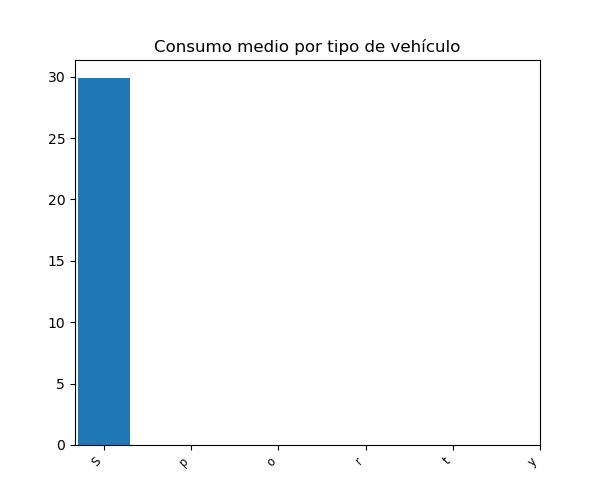

In [55]:
plt.figure(figsize=(6,5))
plt.bar(tipo, consumo, 0.6)
plt.xticks(range(len(tipo)), tipo, rotation=45, ha="right", fontsize='small');
plt.title('Consumo medio por tipo de vehículo');

En el siguiente ejemplo, se muestran los datos correspondientes a dos series. En concreto, se muestran los consumos en ciudad y carretera de los vehículos en función de su tipo. Para ello, es necesario controlar la anchura y posición de las barras. También se modifican algunos elementos adicionales como títulos, leyendas, y colores.

<IPython.core.display.Javascript object>


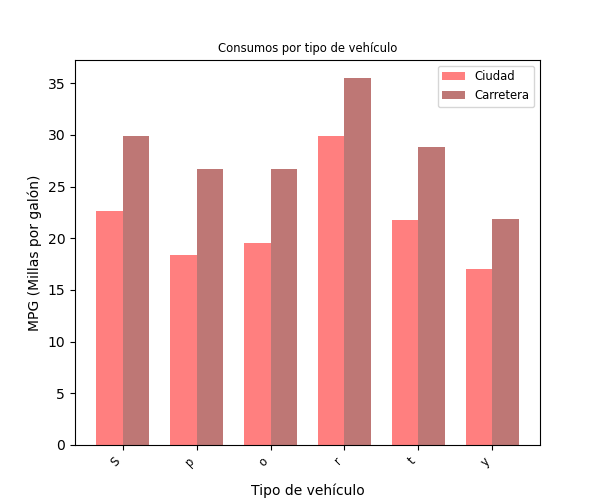

In [56]:
# Establece el ancho de barra
bar_width = 0.36
# Posición (central) de cada par de barras
position = np.arange(len(tipo))

# Crea la figura
plt.figure(figsize=(6,5))
# Dibuja las barras relativas al consumo en ciudad (las desplaza hacia atrás)
plt.bar(position-bar_width/2, consumo, bar_width, alpha=0.5, color="r", label="Ciudad")
# Dibuja las barras relativas al consumo en carretera (las desplaza hacia delante).
plt.bar(position+bar_width/2, consumo_carretera, bar_width, alpha=0.8, color="#AE5552", label="Carretera")

# Ticks
plt.xticks(range(len(tipo)), tipo, rotation=45, ha="right", fontsize='small');

# Títulos
plt.title('Consumos por tipo de vehículo', fontsize='small')
plt.xlabel('Tipo de vehículo', labelpad=10)
plt.ylabel('MPG (Millas por galón)')

# Añade la leyenda
plt.legend(fontsize='small');


<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> 
La función `pyplot.barh()` es similar, pero dibuja las barras horizontalmente. 
</div>

<div style="text-align: right">
<a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></font></a>
</div>

---


<a id="section43"></a> 
## <font color="#004D7F"> Diagramas de sectores o _Pie charts_: <font face="monospace"> pie() </font></font>

Los diagramas de sectores permiten visibilizar proporciones. Desde el punto de vista del uso de la visualización como herramienta de presentación __no__ son recomendables porque, en general, la gráfica no aporta mucha información, sobre todo cuando el número de categorías es grande. Se construyen mediante la función `pyplot.pie()`. 

<IPython.core.display.Javascript object>


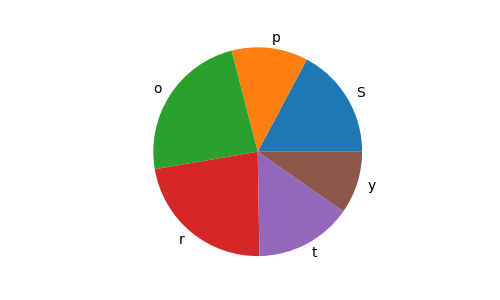

In [54]:
plt.figure(figsize=(5,3))
plt.pie(numero, labels=tipo)
plt.axis('equal');

La función permite cambiar algunos aspectos de la gráfica, como los colores (`colors`), el modo en que se muestra la información (`autopct`), si se destaca algún sector y cuanto (`explode`), etc. 

<IPython.core.display.Javascript object>


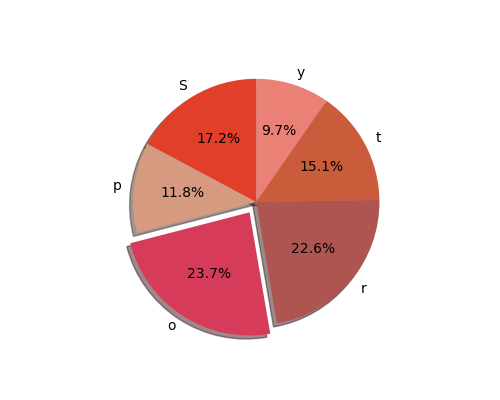

In [57]:
# Colores
colors = ["#E13F29", "#D69A80", "#D63B59", "#AE5552", "#CB5C3B", "#EB8076"]

# Si queremos destacar alguna porción.
explode = [0, 0, 0.1, 0, 0, 0]

# Crea la figura
plt.figure(figsize=(5,4))

# Crea la gráfica
plt.pie(numero, labels=tipo, autopct='%1.1f%%', startangle=90, explode=explode, colors=colors, shadow=True);

# Determina si se dibuja un círculo o se ajusta al tamaño de la gráfica
#plt.axis('equal');

<div style="text-align: right">
<a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></font></a>
</div>

---



<a id="section44"></a> 
## <font color="#004D7F"> Histogramas: <font face="monospace"> hist() </font></font>

Los histogramas son una de las gráficas más importantes para el análisis exploratorio de datos. El rango de los datos se divide en _bins_ (intervalos) y, para cada uno de ellos, se dibuja una barra cuya altura refleja la cantidad de datos que caen dentro.

La función `pyplot.hist()` construye un histograma. El parámetro `bins` determina la distribución de los intervalos del histograma. Si se proporciona un número de _bins_, divide el rango uniformemente; si se proporciona una colección, usa los puntos para delimitar los intervalos. Por otra parte, el histograma puede representar las frecuencias absolutas o las relativas en el eje $y$. En el ejemplo siguiente, con el parámetro `density=0` (valor por defecto), se indica que se utilicen las frecuencias absolutas.

<IPython.core.display.Javascript object>


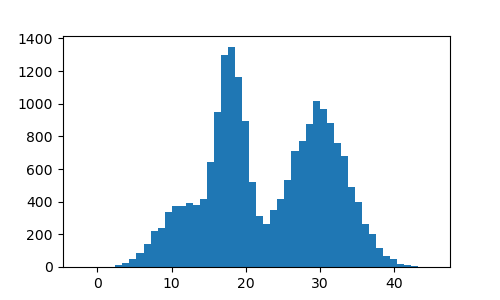

In [58]:
np.random.seed(0)
# Genera un array con 20000 números aleagorios correspondientes a tres distribuciones
data = np.concatenate([30 + 4*np.random.randn(10000),
                       18 + 2*np.random.randn(7000),
                       11 + 3*np.random.randn(3000)])

# Figura
plt.figure(figsize=(5,3))
# Divide el rango de los datos en 50 bins de igual anchura. 
plt.hist(data, bins=50); 

Es posible mostrar datos relativos a distintas variables en un mismo histograma. El siguiente ejemplo muestra la distribución de precios de los coches en función del número de cilindros. El parámetro `stacked` determina si las barras de cada serie se muestran apiladas o separadas.

<IPython.core.display.Javascript object>


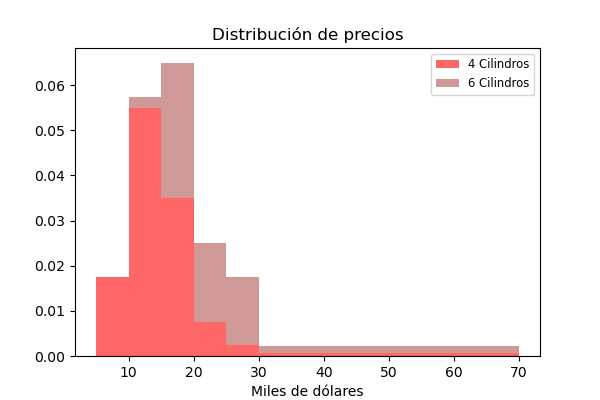

In [59]:
# Extrae los precios de los coches en función del número de cilindros
precios_4 = coches_df[coches_df['cilindros']==4]['precio']
precios_6 = coches_df[coches_df['cilindros']==6]['precio']

# Figura
plt.figure(figsize=(6,4))

# Establece los bins. 
bins = [5, 10, 15, 20, 25, 30, 70]

# Dibuja el histograma
plt.hist([precios_4, precios_6], bins, density=1, stacked=True,
          color=['r', "#AE5552"] , alpha=0.6,   # Colores
          label=['4 Cilindros', '6 Cilindros']) # Etiquetas para la leyenda

# Tígulos, etiqueta y leyenda.
plt.title('Distribución de precios')
plt.xlabel('Miles de dólares')
plt.legend(fontsize='small');

<div style="text-align: right">
<a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></font></a>
</div>


---

<a id="section45"></a> 
## <font color="#004D7F"> Gráficos de dispersión I: <font face="monospace"> scatter() </font></font>


Cuando se tratan series de datos numéricos _bidimensionales_, cada elemento se puede representar mediante un punto con las coordenadas correspondientes. Este tipo de gráficas se denomina _de dispersión_, y proporciona una visión completa de la distribución y densidad de los datos. 

La función `plt.scatter()` dibuja gráficas de dispersión. Además de las coordenadas $x$ e $y$ de cada punto, recibe varios parámetros como `s`, que determina el tamaño de los puntos, o `c`, que determina el color.

<IPython.core.display.Javascript object>


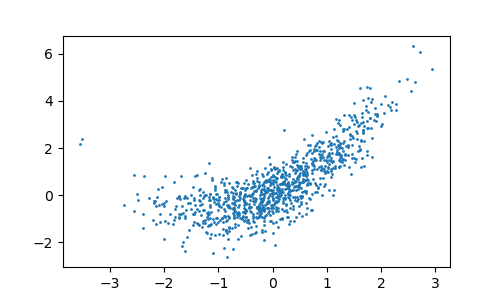

In [60]:
x = np.random.randn(1000)
y = 0.4*x**2 + x + 0.7*np.random.randn(1000)

# Figura
plt.figure(figsize=(5,3))
plt.scatter(x,y,s=1);

Las gráficas de dispersión presentan un problema cuando el tamaño de la serie de datos es grande, ya que la cantidad de puntos impide reflejar la densidad de los datos. 

<IPython.core.display.Javascript object>


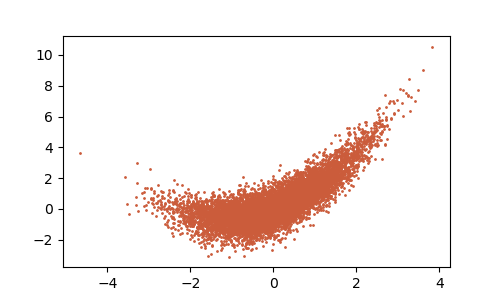

In [61]:
x = np.random.randn(10000)
y = 0.4*x**2 + x + 0.7*np.random.randn(10000)

# Crea la figura
plt.figure(figsize=(5,3))
plt.scatter(x,y,s=1, c='#CB5C3B');   # Se asigna un color a los puntos

<div style="text-align: right">
<a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></font></a>
</div>

---



<a id="section46"></a> 
## <font color="#004D7F"> Mapas de calor: <font face="monospace"> pyplot.hist2d() </font></font>

En el caso particular comentado anteriormente (cuando el tamaño de la serie impide visualizar la densidad) se suele utilizar un _Histograma de dos dimensiones_, en el que se definen intervalos en dos dimensiones, y el valor de cada uno (cantidad de puntos que caen en él) se indica mediante color. Por tanto, este tipo de gráficas permite reflejar la densidad de puntos en cada región. 

La función `pyplot.hist2d()` permite crear histogramas en dos dimensiones. La `plt.colorbar()` permite añadir la barra de color.

<IPython.core.display.Javascript object>


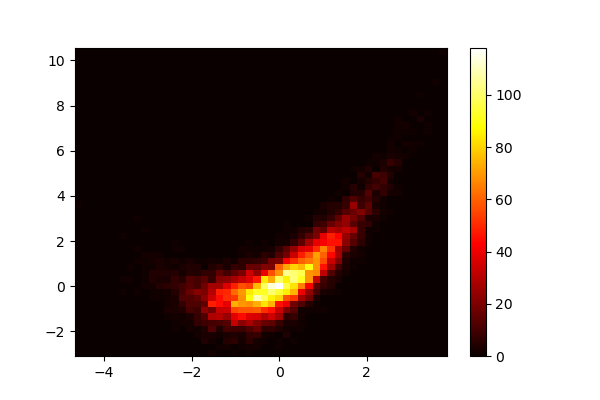

In [62]:
plt.figure(figsize=(6,4))
plt.hist2d(x,y,bins=50);
plt.colorbar();
plt.set_cmap('hot');

<div class="alert alert-block alert-warning">

<i class="fa fa-exclamation-circle" aria-hidden="true"></i>
Aunque algunas veces estas gráficas se denominan mapas de calor, este nombre entra en conflicto con un tipo de gráficas similar que muestra datos categóricos en 2D.
</div>

<div style="text-align: right">
<a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></font></a>
</div>


---

<a id="section47"></a> 
## <font color="#004D7F"> Gráficos de dispersión II: <font face="monospace"> scatter() </font></font>

Las gráficas de dispersión permiten representar datos en tres dimensiones. Debido a que `plt.scatter()` acepta series para pasar el tamaño y color particualr de cada punto, estas características se pueden utilizar para representar una tercera dimensión. 

<IPython.core.display.Javascript object>


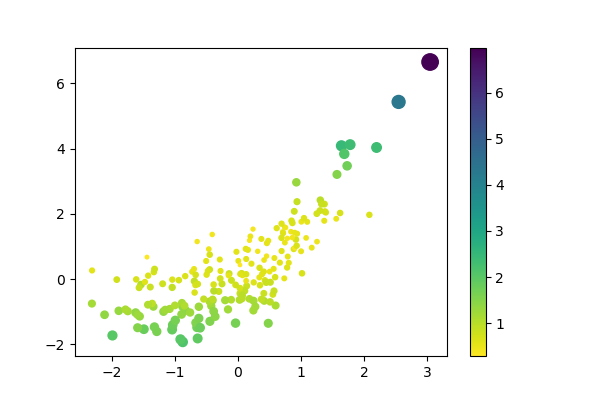

In [63]:
x = np.random.randn(200)
y = 0.4*x**2 + x + 0.7*np.random.randn(200)
z = 0.5 + 0.2*(y-1)**2 + 0.1*np.random.randn(200)

# Figura
plt.figure(figsize=(6,4))
# Utiliza tanto tamaño como el color. 
# Se puede utilizar solo una de las dos
plt.scatter(x,y,s=z*20, c=z, cmap='viridis_r'); 
# Cuando se utiliza color, adicionalmente, se puede añadir una barra de color.
plt.colorbar();

Cuando la tercera dimensión es una variable categórica, se pueden utilizar colores para distinguir las categorías.

<IPython.core.display.Javascript object>


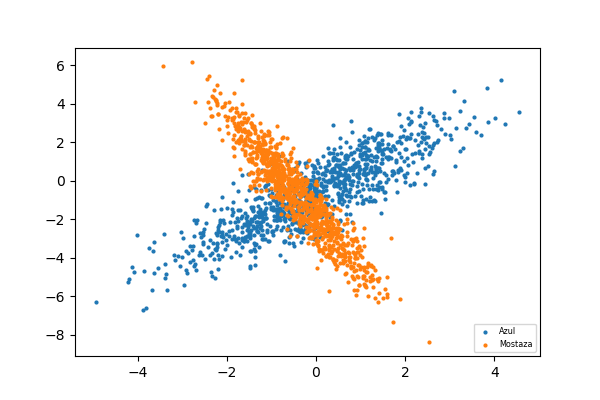

In [64]:
np.random.seed(0)
# Crea dos distribuciones distintas
cat1 = np.random.randn(1000,2) @ np.random.randn(2,2) + np.random.randn(2)
cat2 = np.random.randn(1000,2) @ np.random.randn(2,2) + np.random.randn(2)

# Crea la figura
plt.figure(figsize=(6,4))
# Dibuja los puntos correspondientes a la primera
plt.scatter(cat1[:,0], cat1[:,1],s=4, label='Azul')
# Dibuja los puntos correspondientes a la segunda
plt.scatter(cat2[:,0], cat2[:,1],s=4, label='Mostaza');
# Añade la localización
plt.legend(loc='lower right', fontsize='xx-small');

Es posible elaborar los gráficos de dispersión mucho más completos. La función `pyplot.scatter()` admite varios parámetros. Con `marker`, por ejemplo, se puede especificar el aspecto de los puntos ([documentacion](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html?highlight=matplotlib%20pyplot%20scatter#matplotlib.pyplot.scatter)).

La siguiente figura muestra un ejemplo de la versatilidad de los diagramas de dispersión. Para un conjunto de coches, las coordenadas corresponden a su potencia y peso, el tamaño corresponde al precio, y el color al tipo. Además, se muestra su marca mediante texto.

<div class="alert alert-block alert-danger">
    
<i class="fa fa-exclamation-triangle" aria-hidden="true"></i>
Este ejemplo tiene como objetivo mostrar las posibilidades de la función en una sola gráfica, pero ___no conviene mostrar tanta información___ porque se dificulta la interpretación.  
</div>

In [65]:
coches_dfs = pd.read_csv('data/coches_s.csv', index_col=0)
coches_dfs.head()

,marca,tipo,consumo,consumoCarretera,cilindros,motor,potencia,RPM,largo,ancho,peso,precio
79,Subaru,Small,33,37,3.0,1.2,73,5600,146,60,2045,8.4
69,Oldsmobile,Van,18,23,6.0,3.8,170,4800,194,74,3715,19.5
89,Volkswagen,Compact,21,30,4.0,2.0,134,5800,180,67,2985,20.0
20,Chrysler,Compact,23,28,4.0,3.0,141,5000,183,68,3085,15.8
61,Mitsubishi,Small,29,33,4.0,1.5,92,6000,172,67,2295,10.3


<IPython.core.display.Javascript object>


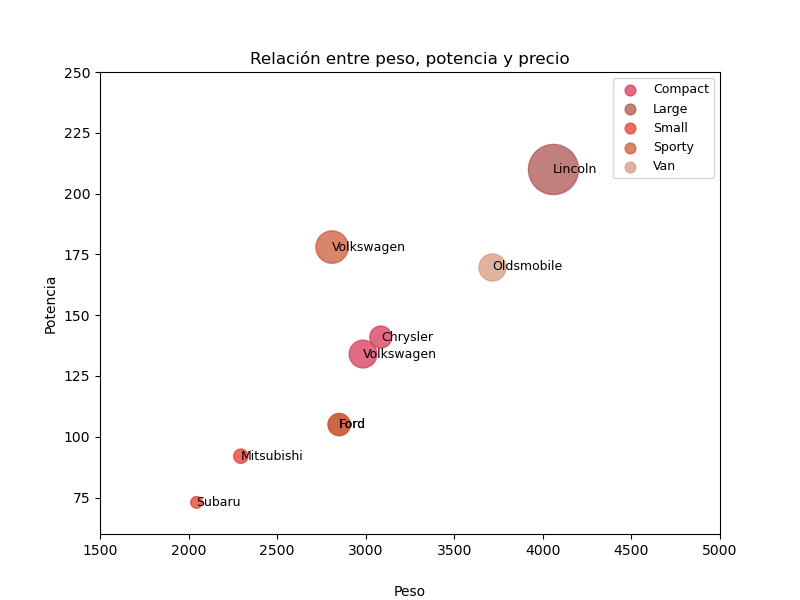

In [66]:
colores = ["#E13F29", "#D69A80", "#D63B59", "#AE5552", "#CB5C3B", "#EB8076"]

# Asigna un color (un índice numérico) a cada tipo creando un diccionario {tipo:numero}
# Ejemplo: color_tipo['Compact']=2
tipos = coches_dfs['tipo'].unique()
color_tipo = {}
for color, tipo in enumerate(tipos):
    color_tipo[tipo]=color
    
# Figura
plt.figure(figsize=(8,6))
plt.xlim(1500,5000)
plt.ylim(60,250)

# Procesa los elementos por tipo y dibuja cada conjunto de datos por separado
for tipo, datos in coches_dfs.groupby('tipo'):
    # Imprime los puntos correspondientes a cada tipo en cada iteración
    plt.scatter(datos['peso'], datos['potencia'], s=datos['precio']**2, label=tipo,
                c=colores[color_tipo[tipo]], alpha = 0.75) 
                #marker = (color_tipo[tipo]+3,1)) # Se pueden cambiar también los símbolos

    
# Escribe la marca de coche
for marca, peso, potencia in zip(coches_dfs['marca'], coches_dfs['peso'], coches_dfs['potencia']):
    plt.text(peso, potencia, marca, horizontalalignment='left', verticalalignment='center', fontsize=9);
    
# Crea la leyenda
legend = plt.legend(loc='best', ncol=1, scatterpoints=1, fontsize=9)

# Hace que las marcas tengan el mismo tamaño en la leyenda
for legend_handle in legend.legendHandles:
    legend_handle._sizes=[60]
    
# Añade títulos y etiqueta
plt.title("Relación entre peso, potencia y precio")
plt.xlabel('Peso', labelpad=20)
plt.ylabel('Potencia')
plt.show()


<div style="text-align: right">
<a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></font></a>
</div>

---

<a id="section48"></a> 
## <font color="#004D7F"> Diagramas de cajas y violines: <font face="monospace"> boxplot() y violinplot()</font></font>

Las gráficas de cajas se pueden crear con `pyplot.boxplot()`. Permiten mostrar la distribución de los datos numéricos en función de variables categóricas. Cada caja (una por valor de la variable categórica) representa la mediana (línea central) y los percentiles 25 y 75. Con respecto a los bigotes, existen varias convenciones al respecto. En Matplotlib corresponden a 1.5 veces el rango intercualtil. Los puntos que caen fuera de ese rango, se dibujan de manera individual.



<IPython.core.display.Javascript object>


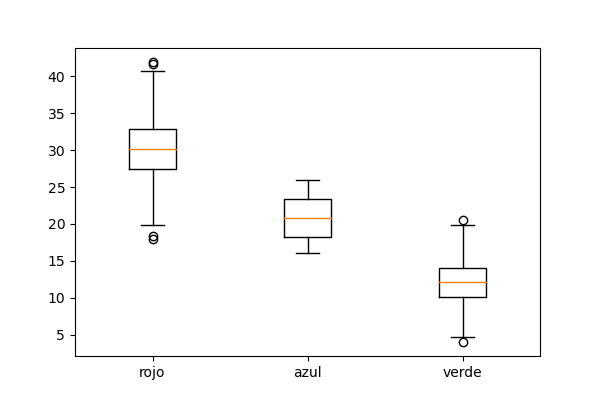

In [67]:
data= {"rojo": 30 + 4*np.random.randn(1000),
       "azul": 16 + 10*np.random.rand(700),
       "verde": 12 + 3*np.random.randn(300)}

# Figura
plt.figure(figsize=(6,4))
plt.boxplot(data.values())
plt.xticks(range(1,len(data)+1), data.keys());

Es posible cambiar el aspecto de las distintas componentes de las cajas y el resto de componentes de la gráfica, pero esto requiere acceder directamente a ellas. 

<IPython.core.display.Javascript object>


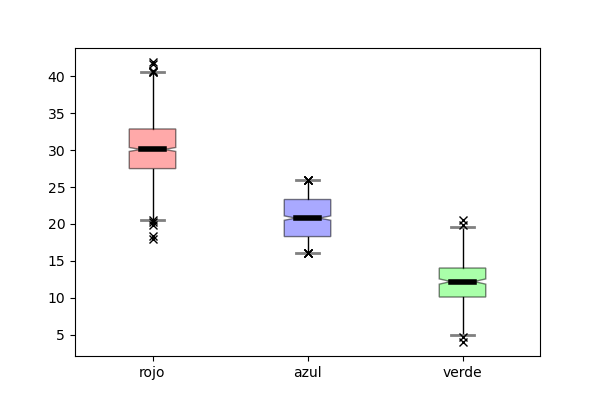

In [68]:
colors = ["#FF5555", "#5555FF", "#55FF55"]

# Figura
plt.figure(figsize=(6,4))
# Devuelve cada una de las figuras para poder modificarla    
bp = plt.boxplot(data.values(), notch=True, sym='x', whis = [0.5, 99.5], patch_artist=True) 

# Dibuja las medianas de color negro, accede a todas a la vez.
plt.setp(bp['medians'], color='black', linewidth=4)         # Color de las medianas
plt.setp(bp['caps'], color='gray', linewidth=2)             # Color de la línea que marca el rango de interés.
plt.setp(bp['boxes'], color='black')                        # Color del rectángulo que marca la caja.    
plt.setp(bp['whiskers'], color='black')                     # Color de la línea vertical

# Colorea cada caja de manera independiente.
for ind, box in enumerate(bp['boxes']):
    plt.setp(box, facecolor = colors[ind], alpha=0.5) 
    #box.set(facecolor = colores[ind])                       # Directamente a través de la API
    #box.set_facecolor(colores[ind])    
    
plt.xticks(range(1,len(data)+1), data.keys());

Las cajas y bigotes no capturan la distribución de los datos totalmente. Las gráficas de tipo violín, que se dibujan con `plt.violinplot()`, crean una función de densidad por cada uno de los valores categóricos en la dirección vertical.

<IPython.core.display.Javascript object>


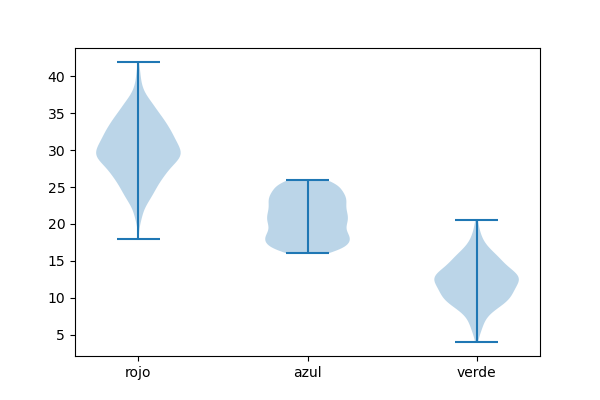

In [69]:
plt.figure(figsize=(6,4))

violins = plt.violinplot(data.values())
plt.xticks(range(1,len(data)+1), data.keys());

<div class="alert alert-block alert-warning">

<i class="fa fa-exclamation-circle" aria-hidden="true"></i>
Los gráficas de las funciones de densidad de los violines son simétricas por estética.
</div>

También es posible cambiar el aspecto de cada violín.

<IPython.core.display.Javascript object>


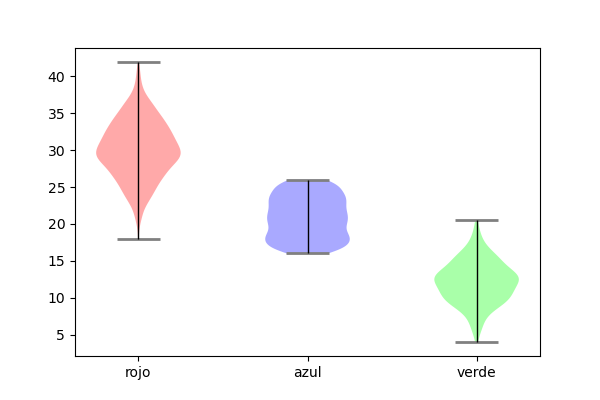

In [70]:
plt.figure(figsize=(6,4))
violins = plt.violinplot(data.values())
  
# Colorea cada violíon de manera independiente.
for ind, bo in enumerate(violins['bodies']):
    plt.setp(bo, facecolor = colors[ind], alpha=0.5) 

plt.setp(violins['cbars'], color='black', linewidth=1)   
plt.setp(violins['cmaxes'], color='gray', linewidth=2)  
plt.setp(violins['cmins'], color='gray', linewidth=2)

plt.xticks(range(1,len(data)+1), data.keys());



---

<a id="section49"></a> 
## <font color="#004D7F">Gráficas de dispersión 3D</font>
<br>

Cuando se pretende representar tres dimensiones de los datos mediante un diagrama de dispersión, la visualización es más difícil, ya que el gráfico final tiene dos dimensiones.  Al igual que ocurre con los _Pie Charts_, se recomienda evitar este tipo de gráficas, ya que lo que realmente se muestra en ellas es una proyección y, en muchos casos, impide visualizar las características de los datos. Hay una excepción al respecto, y es cuando se puede interactuar con las figuras.

<IPython.core.display.Javascript object>


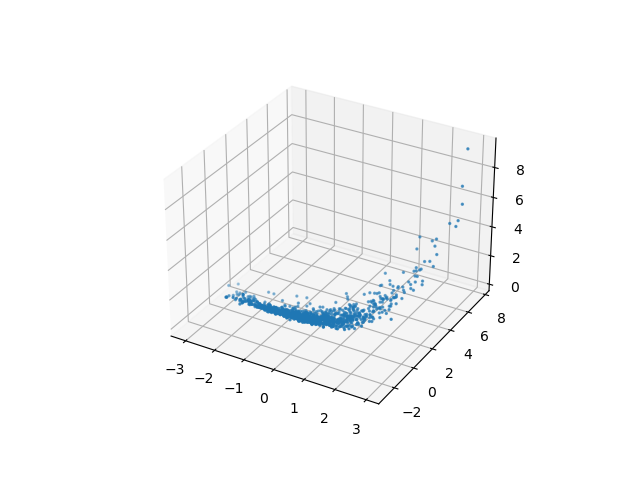

In [71]:
x = np.random.randn(1000)
y = 0.4*x**2 + x + 0.7*np.random.randn(1000)
z = 0.5 + 0.2*(y-1)**2 + 0.1*np.random.randn(1000)

# Figura
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z, s=2);

<div style="text-align: right">
<a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></font></a>
</div>


---


<a id="section5"></a> 
# <font color="#004D7F"> 5. Múltiples grafos en una figura </font>
<br>

Existen varias formas de componer figuras con varias gráficas (varios objetos `Axes`). 


<a id="section51"></a> 
## <font color="#004D7F"> <font face="monospace"> pyplot.subplot() </font></font>


La llamada a `pyplot.subplot(filas, columnas, posición)` divide la figura actual en una cuadrícula de tamaño _filas x columnas_, y crea un objeto `Axes` en la _posición_  (celda) correspondiente. Permite además tomar como referencia las escalas de otro objeto `Axes` mediante los parámetros `sharex` y `sharey`. Esto resulta de utilidad cuando las figuras han de ser comparadas. 

<IPython.core.display.Javascript object>


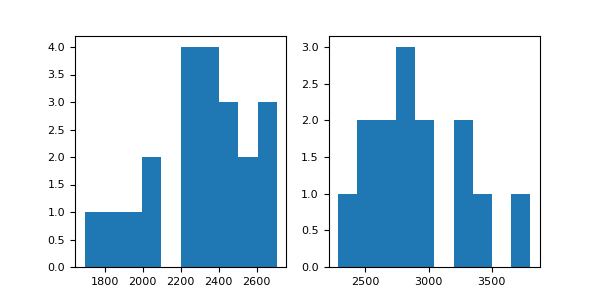

In [72]:
coches_small = coches_df[coches_df['tipo']=='Small']
coches_sporty = coches_df[coches_df['tipo']=='Sporty']

f = plt.figure(figsize=(6,3))
# Figura de la izquierda
ax_izq = plt.subplot(1, 2, 1)
plt.hist(coches_small['peso']);

# Figura de la derecha
ax_der = plt.subplot(1, 2, 2)
#ax_der = plt.subplot(1, 2, 2, sharey=ax_izq)
plt.hist(coches_sporty['peso']);

# Cambia los tamaños de fuente en ambos
ax_der.tick_params(axis='both', labelsize=8)
ax_izq.tick_params(axis='both', labelsize=8)

# Aumenta el espacio entreambos
f.subplots_adjust(hspace=1)

<div style="text-align: right">
<a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></font></a>
</div>

---


<a id="section52"></a> 
## <font color="#004D7F"> <font face="monospace"> pyplot.subplots() </font></font>


Una alternativa a la función anterior consiste en crear los objetso `Axes` con `plt.subplots()`. Ésta admite varios parámetros para controlar la distribución y aspecto de las figuras, incluidos `shareX` y `shareY`. Puede encontrarse más información sobre el manejo de esta función [aquí](http://matplotlib.org/examples/pylab_examples/subplots_demo.html).

<IPython.core.display.Javascript object>


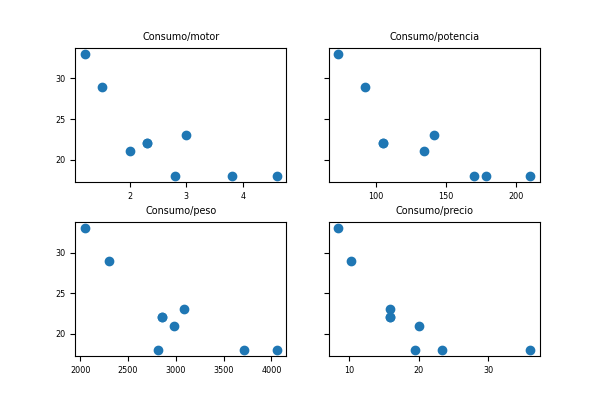

In [73]:
# Crea una figura en la que va a incluir 4 gráficas, distribuídas en una rejilla de 2x2
f, axes_grid = plt.subplots(2, 2, figsize=(6,4), sharey=True);

# Genera las 4 gráficas.
axes_grid[0, 0].scatter(coches_dfs['motor'], coches_dfs['consumo'])
axes_grid[0, 0].set_title('Consumo/motor')

axes_grid[0, 1].scatter(coches_dfs['potencia'], coches_dfs['consumo'])
axes_grid[0, 1].set_title('Consumo/potencia')

axes_grid[1, 0].scatter(coches_dfs['peso'], coches_dfs['consumo'])
axes_grid[1, 0].set_title('Consumo/peso')

axes_grid[1, 1].scatter(coches_dfs['precio'], coches_dfs['consumo'])
axes_grid[1, 1].set_title('Consumo/precio')

# Reduce el tamaño de letra de los títulos
plt.setp([ax.title for ax in axes_grid.flatten()], fontsize='x-small')

# Reduce el tamaño de letra de los ticks en el eje x
plt.setp([ax.get_xticklabels() for ax in axes_grid.flatten()], fontsize='xx-small')

# Quita las etiquetas del eje y en las figuras de la derecha
plt.setp([ax.get_yticklabels() for ax in axes_grid[:, 1]], visible=False)

# Reduce el tamaño en las de la izquierda
plt.setp([ax.get_yticklabels() for ax in axes_grid[:, 0]], fontsize='xx-small')

# Separa las gráficas
f.subplots_adjust(hspace=0.3)

plt.show();

<div style="text-align: right">
<a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></font></a>
</div>

---


<a id="section53"></a> 
## <font color="#004D7F"> <font face="monospace"> pyplot.subplot2grid() </font> y <font face="monospace"> gridspec.GridSpec() </font> </font>

<br>

Se pueden hacer composiciones más complejas mediante la función `pyplot.subplot2grid()`. Cada llamada corresponde a una figura, y recibe cuatro parámetros. El primero es una tupla con el tamaño con la rejilla. El segundo la posición en la que se colocará la gráfica. El tercero la anchura, en columnas, de la gráfica. Y el cuarto la altura, en filas. 

<IPython.core.display.Javascript object>


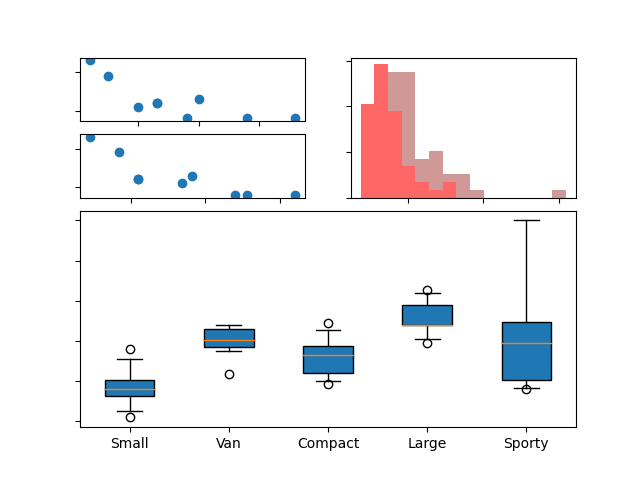

In [74]:
# Crea un array de objetos para poder iterar sobre los 
axes_grid = np.zeros(4, dtype=object)

plt.figure()

# Dimensiona las figuras
axes_grid[0] = plt.subplot2grid((5,2), (0,0), rowspan=1, colspan=1)
axes_grid[1] = plt.subplot2grid((5,2), (1,0), rowspan=1, colspan=1)
axes_grid[2] = plt.subplot2grid((5,2), (0,1), rowspan=2, colspan=1)
axes_grid[3] = plt.subplot2grid((5,2), (2,0), rowspan=3, colspan=2)

# Crea las distintas figuras.

# Dos scatter arriba, a la izquierda
axes_grid[0].scatter(coches_dfs['motor'], coches_dfs['consumo'])
axes_grid[1].scatter(coches_dfs['potencia'], coches_dfs['consumo'])

# Un histograma
axes_grid[2].hist([precios_4, precios_6], 15, density=1, color=['r', "#AE5552"] , alpha=0.6, 
                  label=['4 Cilindros', '6 Cilindros'], stacked=True)
# Un Boxplot
potencias = []
for tipo in tipos:
    potencias.append(coches_df[coches_df['tipo']==tipo]['potencia'])
    
axes_grid[3].boxplot(potencias, notch=False, sym='o', whis = [5, 95], patch_artist=True) 
axes_grid[3].set_xticklabels(tipos)

# Elimina los ticks del eje x, salvo para la última
plt.setp([ax.get_xticklabels() for ax in axes_grid[:-1]], visible=False)

# Elimina los ticks del eje y
plt.setp([ax.get_yticklabels() for ax in axes_grid], visible=False);

Otra forma de hacer esto consiste en pasarle un objeto de tipo `gridspec.GridSpec()` a `pyplot.subplot()`.

<IPython.core.display.Javascript object>


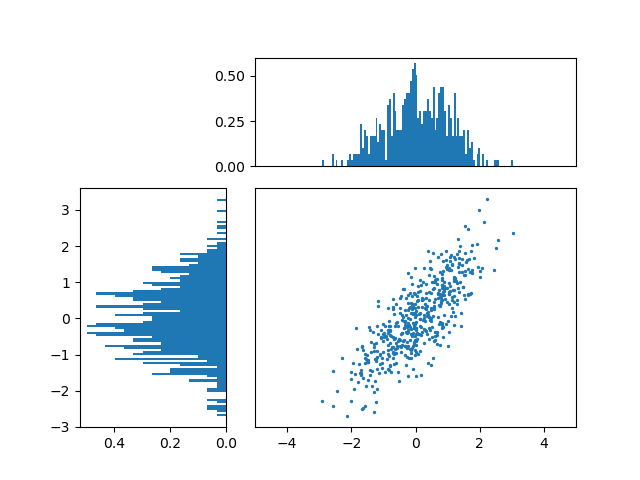

In [75]:
import matplotlib.gridspec as gridspec

plt.figure()

# Crea una rejilla de tres por tres. 
gspec = gridspec.GridSpec(3, 3)

# Primera gráfica, ocupa las dos últimas columnas de la primera fila. 
ax_arriba= plt.subplot(gspec[0, 1:])
# Segunda gráfica, ocupa las dos últimas filas de la primera columna.  
ax_izquierda = plt.subplot(gspec[1:, 0])
# Gráfica principal, ocupa las dos últimas columnas y las dos últimas filas. 
ax_principal = plt.subplot(gspec[1:, 1:])

# Crea una distribución bivariada de datos. 
X, Y = np.random.multivariate_normal([0, 0], np.array([[1, 0.8], [0.8, 1]]), 500).T

# Dibuja la gráfica de dispersión
ax_principal.scatter(X, Y, s=2)
# Dibuja los histogramas de frecuencias (normed)
ax_arriba.hist(X, bins=100, density=True)
#ax_izquierda.hist(Y, bins=100)
ax_izquierda.hist(Y, bins=100, orientation='horizontal', density=True);

# Da la vuelta al eje x del histograma de la izquierda
ax_izquierda.invert_xaxis()

# Establece el rango para x de las dos subfiguras
for ax in [ax_arriba, ax_principal]:
    ax.set_xlim(-5, 5)
    
# Borra los ticks
ax_arriba.set_xticks([])  
ax_principal.set_yticks([]);

<div style="text-align: right">
<a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></font></a>
</div>

---

<a id="section44"></a> 
## <font color="#004D7F"> Superposición de gráficas </font>


Existe la posibilidad de añadir figuras dentro de otras figuras mediante `mpl_toolkits.axes_grid1.inset_locator`. En el siguiente ejemplo se dibuja el diagrama de barras hecho anteriormente, y dentro de él, una gráfica de sectores. 

<IPython.core.display.Javascript object>


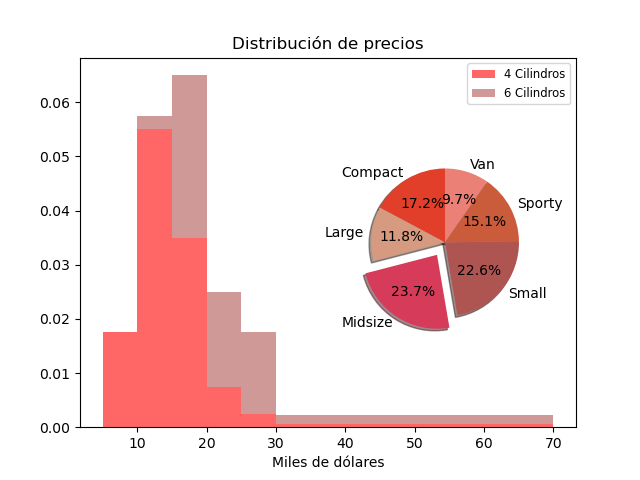

In [76]:
import mpl_toolkits.axes_grid1.inset_locator as mpl_il

# Primero dibujamos el histograma anterior. 
precios_4 = coches_df[coches_df['cilindros']==4]['precio']
precios_6 = coches_df[coches_df['cilindros']==6]['precio']

plt.figure()
plt.title('Distribución de precios')
bins = [5, 10, 15, 20, 25, 30, 70]
plt.hist([precios_4.values, precios_6.values], bins=bins, density=1, color=['r', "#AE5552"] , alpha=0.6, 
         label=['4 Cilindros', '6 Cilindros'], stacked=True)

plt.xlabel('Miles de dólares')
plt.legend(fontsize='small')

# Añadimos un pie chart.
colores = ["#E13F29", "#D69A80", "#D63B59", "#AE5552", "#CB5C3B", "#EB8076"]
# Obtenemos el número de colores por tipo.
coches_tipo = coches_df.groupby('tipo').size()
tipos = list(coches_df.groupby('tipo').groups.keys())
explode = [0, 0, 0.2, 0, 0, 0]
ax2 = mpl_il.inset_axes(plt.gca(), width='50%', height='50%', loc=7)
ax2.pie(coches_tipo, labels=tipos, autopct='%1.1f%%', startangle=90, explode=explode, 
        colors=colores, shadow=True)
ax2.margins(x=0.5)


plt.show()

<div style="text-align: right">
<a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></font></a>
</div>

---

<a id="section6"></a> 
# <font color="#004D7F"> 6. Interacción </font>

Matplotlib permite cierto nivel de interacción con las gráficas. La siguiente celda, por ejemplo, reacciona al click del ratón generando un evento `onclick`, que imprime un texto con las coordenadas del evento.

<IPython.core.display.Javascript object>


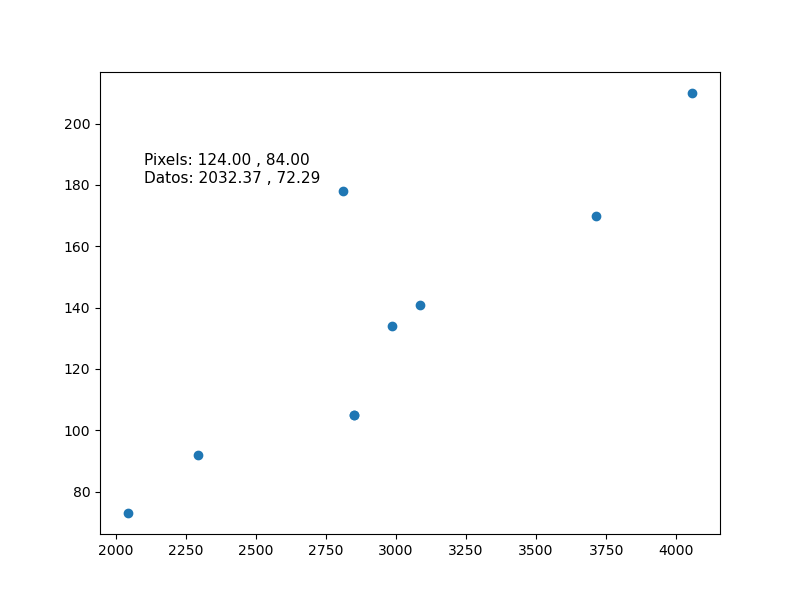

In [77]:
pesos = coches_dfs['peso']
potencias = coches_dfs['potencia']

plt.figure(figsize=(8,6))
plt.scatter(pesos, potencias, picker=20)
texto = plt.text(2100, 185, 'Texto', horizontalalignment='left', verticalalignment='center', fontsize=11);

def onclick(event):
    plt.cla()
    plt.scatter(pesos, potencias, picker=5)
    texto = plt.text(2100,185,('Pixels: {:.2f} , {:.2f}  \nDatos: {:.2f} , {:.2f}  '.
                     format(event.x, event.y, event.xdata, event.ydata)),
                     horizontalalignment='left', verticalalignment='center', fontsize=11);       
                 
plt.gcf().canvas.mpl_connect('button_press_event', onclick);

Otra posibilidad consiste en seleccionar puntos relativos a los datos.  En el gráfico anterior se ha marcado `picker=5`. Eso parámetro indica que se establece un radio alrededor de cada objeto, de modo un click dentro de ese área produce un evento `onpick`.

En este caso toma los datos anteriores, con la marca de cada coche, y muestra esta información en el título de la figura. 

In [78]:
def onpick(event):
    origin = coches_dfs.iloc[event.ind[0]]['marca']
    plt.gca().set_title('La marca es {}'.format(origin))

binding_id = plt.gcf().canvas.mpl_connect('pick_event', onpick)


<div style="text-align: right">
<a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></font></a>
</div>

---

<div style="text-align: right"> <font size=6><i class="fa fa-coffee" aria-hidden="true" style="color:#004D7F"></i> </font></div>